In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing dataset
dataset=pd.read_csv(r'C:\Users\User\zp2\data\daily.csv')
dataset

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00
...,...,...
5475,2018-10-09,3.40
5476,2018-10-10,3.45
5477,2018-10-11,3.16
5478,2018-10-12,3.19


In [3]:
dataset.tail()

,Date,Price
5475,2018-10-09,3.40
5476,2018-10-10,3.45
5477,2018-10-11,3.16
5478,2018-10-12,3.19
5479,2018-10-15,3.26


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 0 to 5479
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5480 non-null   object 
 1   Price   5479 non-null   float64
dtypes: float64(1), object(1)
memory usage: 85.8+ KB


In [5]:
dataset['year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['month'] = pd.DatetimeIndex(dataset['Date']).month
dataset['day'] = pd.DatetimeIndex(dataset['Date']).day

In [6]:
dataset

,Date,Price,year,month,day
0,1997-01-07,3.82,1997,1,7
1,1997-01-08,3.80,1997,1,8
2,1997-01-09,3.61,1997,1,9
3,1997-01-10,3.92,1997,1,10
4,1997-01-13,4.00,1997,1,13
...,...,...,...,...,...
5475,2018-10-09,3.40,2018,10,9
5476,2018-10-10,3.45,2018,10,10
5477,2018-10-11,3.16,2018,10,11
5478,2018-10-12,3.19,2018,10,12


In [7]:
#droping the column
dataset.drop('Date', axis=1, inplace=True)

In [8]:
#checking the null values
dataset.isnull().any()

Price     True
year     False
month    False
day      False
dtype: bool

<AxesSubplot:xlabel='Price'>

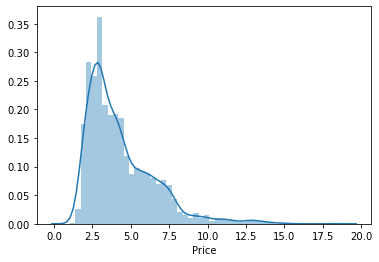

In [9]:
import seaborn as sns
sns.distplot(dataset['Price'].dropna())

In [10]:
#handling of missing values
dataset['Price'].fillna(dataset['Price'].median(),inplace=True)

No handles with labels found to put in legend.


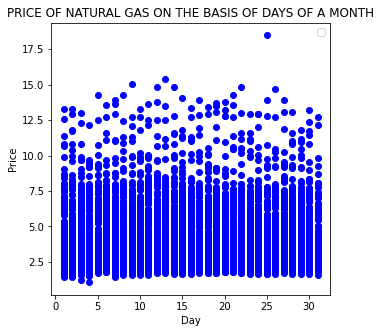

In [11]:
#data visualization
#import the matplotlib library
import matplotlib.pyplot as plt
#plot size
fig=plt.figure(figsize=(5,5))
plt.scatter(dataset['day'],dataset['Price'],color='blue')
#Set the label for the x-axis.
plt.xlabel('Day')
#Set the label for the y-axis.
plt.ylabel('Price')
#Set a title for the axes.
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF A MONTH')
#Place a legend on the axes.
plt.legend()

No handles with labels found to put in legend.


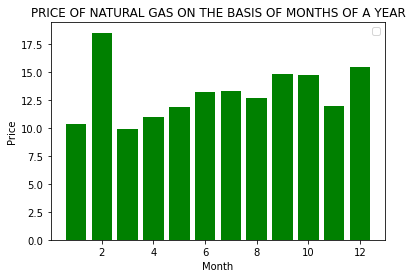

In [12]:
import matplotlib.pyplot as plt
plt.bar(dataset['month'],dataset['Price'],color='green')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

<AxesSubplot:xlabel='year', ylabel='Price'>

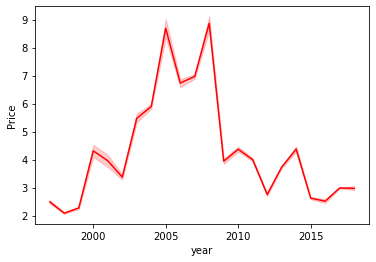

In [13]:
import seaborn as sns
sns.lineplot(x='year',y='Price',data=dataset,color='red')

<AxesSubplot:xlabel='month', ylabel='Price'>

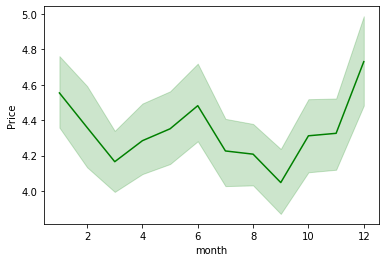

In [14]:
import seaborn as sns
sns.lineplot(x='month',y='Price',data=dataset,color='green')

<AxesSubplot:xlabel='day', ylabel='Price'>

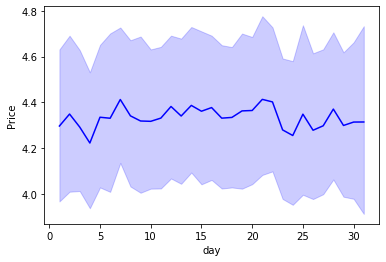

In [15]:
import seaborn as sns
sns.lineplot(x='day',y='Price',data=dataset,color='blue')

No handles with labels found to put in legend.


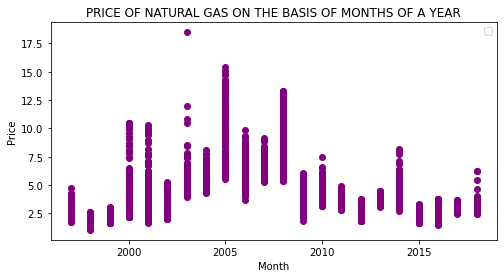

In [16]:
fig=plt.figure(figsize=(8,4))
plt.scatter(dataset['year'],dataset['Price'],color='purple')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

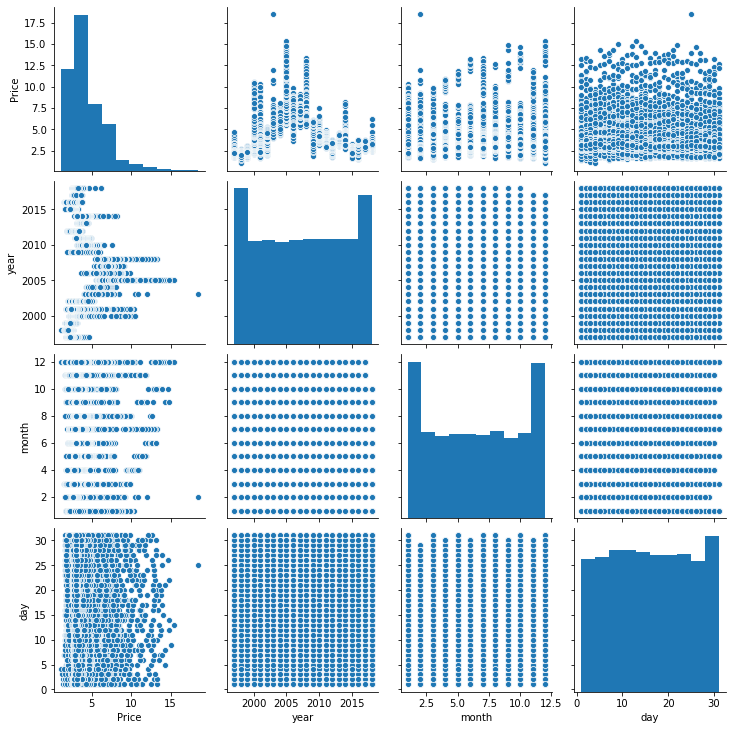

In [17]:
import seaborn as sns
sns.pairplot(dataset)
plt.show()

In [18]:
#Seperating the dependent and independent

In [19]:
x=dataset.iloc[:,1:4].values #inputs
y=dataset.iloc[:,-4].values #output price only

In [20]:
x

array([[1997,    1,    7],
       [1997,    1,    8],
       [1997,    1,    9],
       ...,
       [2018,   10,   11],
       [2018,   10,   12],
       [2018,   10,   15]], dtype=int64)

In [21]:
y

array([3.82, 3.8 , 3.61, ..., 3.16, 3.19, 3.26])

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc= StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.65907201, -1.6102114 , -0.99588795],
       [-1.65907201, -1.6102114 , -0.88145408],
       [-1.65907201, -1.6102114 , -0.7670202 ],
       ...,
       [ 1.6722142 ,  1.02976022, -0.53815245],
       [ 1.6722142 ,  1.02976022, -0.42371857],
       [ 1.6722142 ,  1.02976022, -0.08041694]])

In [24]:
import joblib
joblib.dump(sc,'s1')

['s1']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
x_train.shape

(4384, 3)

In [27]:
y_train.shape

(4384,)

In [28]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
#fitting the model or training the model
dtr.fit(x_train,y_train)


DecisionTreeRegressor()

In [29]:
y_pred=dtr.predict(x_test)
y_pred

array([6.38, 2.23, 2.15, ..., 2.1 , 2.48, 5.61])

In [30]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)
accuracy

0.9731221024648377

In [31]:
y_p=dtr.predict([[1997,1,7]])
y_p

array([3.26])

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
regressor= RandomForestRegressor()

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
#randomized search cv parameters
n_estimators=[int(x) for x in np.linspace(100,1200,12)]
max_depth=[int(x) for x in np.linspace(5,30,6)]
min_samples_leaf=[1,2,5,10]
criterion=['entropy','gini']

In [36]:
#crate a random grid
random_grid={'n_estimators':n_estimators,
            'max_depth':max_depth,
            'min_samples_leaf':min_samples_leaf
            }
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_leaf': [1, 2, 5, 10]}

In [37]:
rf_random= RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5,random_state=0)


In [38]:
rf_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error')

In [39]:
rf_random.best_params_

{'n_estimators': 100, 'min_samples_leaf': 1, 'max_depth': 30}

In [40]:
predictions=rf_random.predict(x_test)
predictions

array([6.7439, 2.2619, 2.1534, ..., 2.1098, 2.5526, 6.8023])

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.9857450890588872

In [42]:
y_r=rf_random.predict([[1998,11,7]])
y_r

array([3.2651])

In [43]:
import joblib
joblib.dump(rf_random,'r1.save')

['r1.save']